In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/atlantis_citizens_final.csv")


In [3]:
df_train

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2
...,...,...,...,...,...,...,...,...,...,...
15746,CIT_10602,Seaweed,Mariana Plaza,Merchant,2896.0,428.0,59.0,Sea Scooter,Mariana Plaza,268659a4
15747,CIT_0865,Seaweed,Coral Slums,Miner,1671.0,100.0,47.0,No Vehicle,Mariana Plaza,ca287a73
15748,CIT_0809,Exotic Imports,Mariana Plaza,Scribe,4656.0,756.0,53.0,Fin Bicycle,Mariana Plaza,717ca395
15749,CIT_10750,Seafood,The Golden Reef,Merchant,17529.0,3961.0,72.0,No Vehicle,The Golden Reef,34fb8c73


In [4]:
df_train.isna().sum()

Citizen_ID             0
Diet_Type              0
District_Name          0
Occupation             0
Wealth_Index        1055
House_Size_sq_ft    1197
Life_Expectancy      614
Vehicle_Owned          0
Work_District          0
Bio_Hash               0
dtype: int64

In [5]:
df = df_train.copy()
df["Wealth_Missing"] = df["Wealth_Index"].isna()
df.groupby("Occupation")["Wealth_Missing"].mean()*100

Occupation
Fisher      6.728316
Merchant    6.421499
Miner       6.538970
Scribe      6.624355
Warrior     7.136788
Name: Wealth_Missing, dtype: float64

Each occupation has roughly the same number of wealths missing, so there is no discrepancy of record keeping or receving salary between occupations.

In [6]:
print(len(df_train["Bio_Hash"].unique()))
len(df_train)

15751


15751

Since these values are same, bio hash won't provide useful patterns to predict occupation. We will drop it.

In [7]:
df_temp = df_train.dropna().drop(columns = ["Citizen_ID", "Bio_Hash"]).copy()
df_temp

,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District
0,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza
1,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench
2,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench
4,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench
5,Seaweed,Mariana Plaza,Warrior,6173.0,911.0,47.0,Sea Scooter,Deep Trench
...,...,...,...,...,...,...,...,...
15746,Seaweed,Mariana Plaza,Merchant,2896.0,428.0,59.0,Sea Scooter,Mariana Plaza
15747,Seaweed,Coral Slums,Miner,1671.0,100.0,47.0,No Vehicle,Mariana Plaza
15748,Exotic Imports,Mariana Plaza,Scribe,4656.0,756.0,53.0,Fin Bicycle,Mariana Plaza
15749,Seafood,The Golden Reef,Merchant,17529.0,3961.0,72.0,No Vehicle,The Golden Reef


In [8]:
# Encoding the categorical columns to make the heatmap
mapping = {}
for col in df_temp.columns:
    if df_temp[col].dtype == "object":
        df_temp[col] = df_temp[col].astype("category")
        df_temp[col+"_code"] = df_temp[col].cat.codes
        mapping[col] = dict(enumerate(df_temp[col].cat.categories))
mapping

{'Diet_Type': {0: 'Exotic Imports', 1: 'Seafood', 2: 'Seaweed'},
 'District_Name': {0: 'Coral Slums',
  1: 'Deep Trench',
  2: 'Mariana Plaza',
  3: 'The Golden Reef'},
 'Occupation': {0: 'Fisher',
  1: 'Merchant',
  2: 'Miner',
  3: 'Scribe',
  4: 'Warrior'},
 'Vehicle_Owned': {0: 'Fin Bicycle',
  1: 'No Vehicle',
  2: 'Royal Submarine',
  3: 'Sea Scooter',
  4: 'Submarine'},
 'Work_District': {0: 'Coral Slums',
  1: 'Deep Trench',
  2: 'Mariana Plaza',
  3: 'The Golden Reef'}}

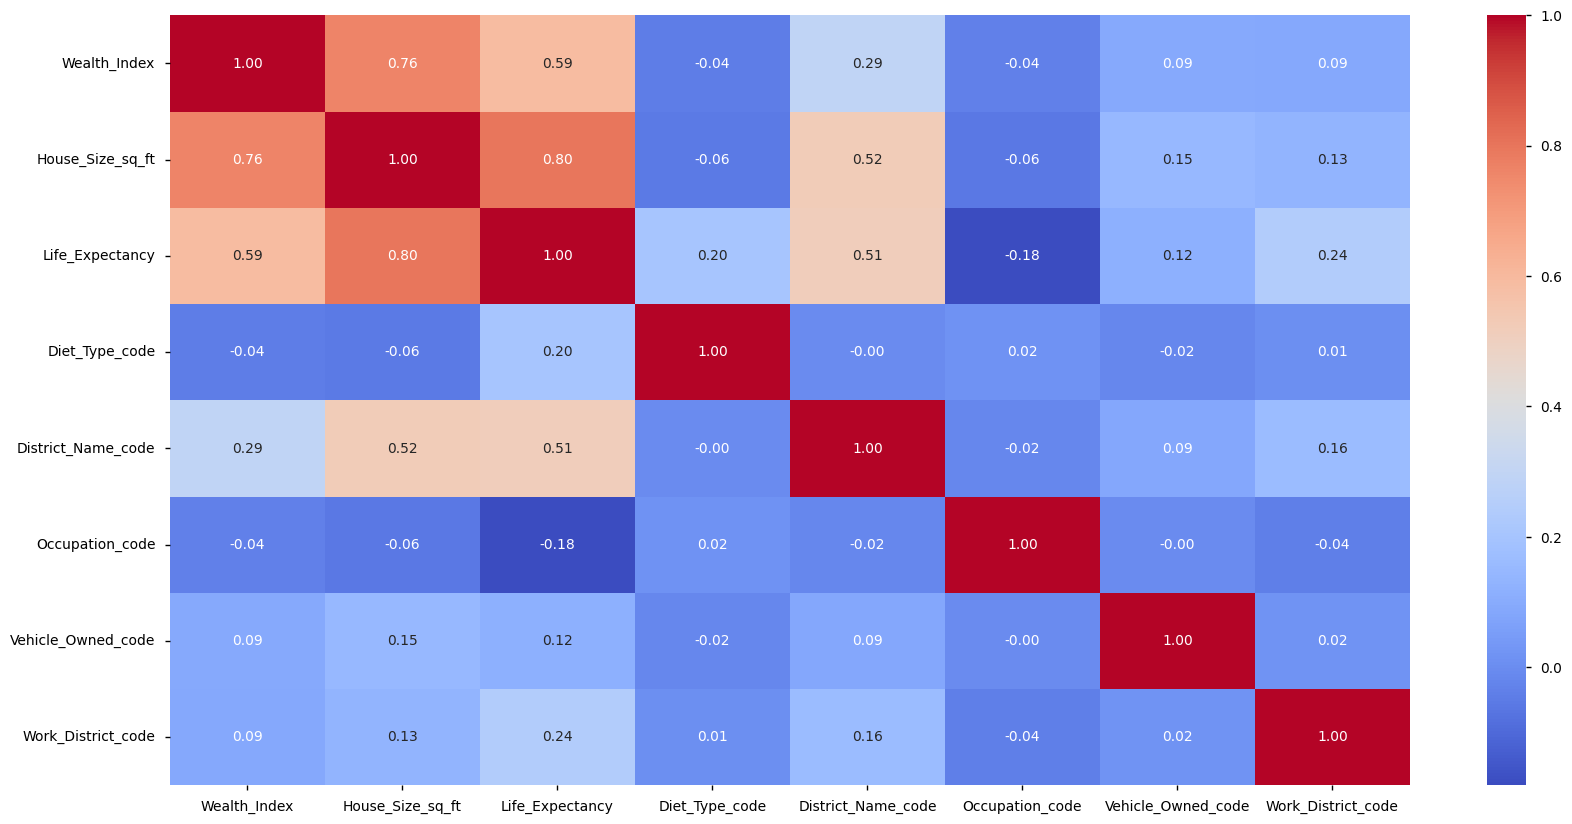

In [9]:
corr_matrix = df_temp.corr(numeric_only = True)
plt.style.use("seaborn-v0_8-notebook")
plt.figure(figsize=(20, 10)) 
sns.heatmap(corr_matrix,annot = True , cmap = "coolwarm",fmt=".2f");

We see that wealth index, house size and life expectancy are largely correlated to the district. We needed to find a categorial veriable so we can group the data according to that variable.

Now we will fill the null values with the medians of the groups.

In [10]:
# Make new dataframe to do EDA
df_eda = df_train.copy()

In [11]:
# Creating a function so we can later use it in our pipeline
def impute_strat(df):
    df["Wealth_Index"] = df["Wealth_Index"].fillna(
        df.groupby(["District_Name"])["Wealth_Index"].transform("median"))

    df["Life_Expectancy"] = df["Life_Expectancy"].fillna(
        df.groupby(["District_Name"])["Life_Expectancy"].transform("median"))

    df["House_Size_sq_ft"] = df["House_Size_sq_ft"].fillna(
        df.groupby(["District_Name"])["House_Size_sq_ft"].transform("median"))
    df = df.fillna(df.median(numeric_only = True))

In [12]:
impute_strat(df_eda)

<Axes: xlabel='Occupation', ylabel='Life_Expectancy'>

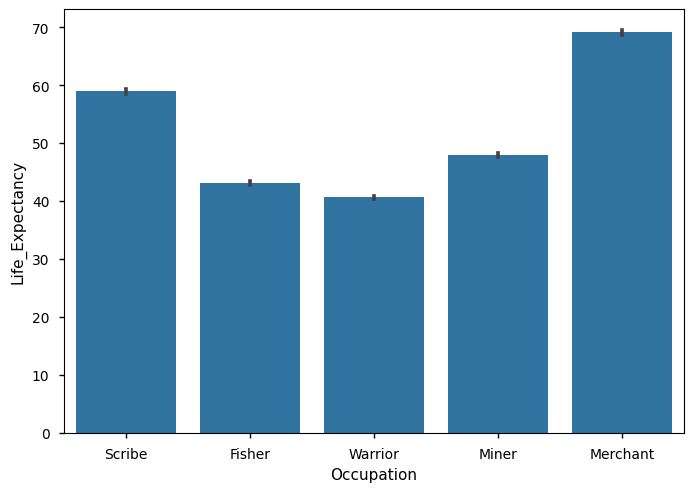

In [13]:
sns.barplot(data = df_eda, x = "Occupation", y = "Life_Expectancy")

# Occupation Hazards
We see that fisher, warrior and miner have lower life expectancy compared to the much safer occupations scribe and merchant

<Axes: xlabel='Work_District', ylabel='Life_Expectancy'>

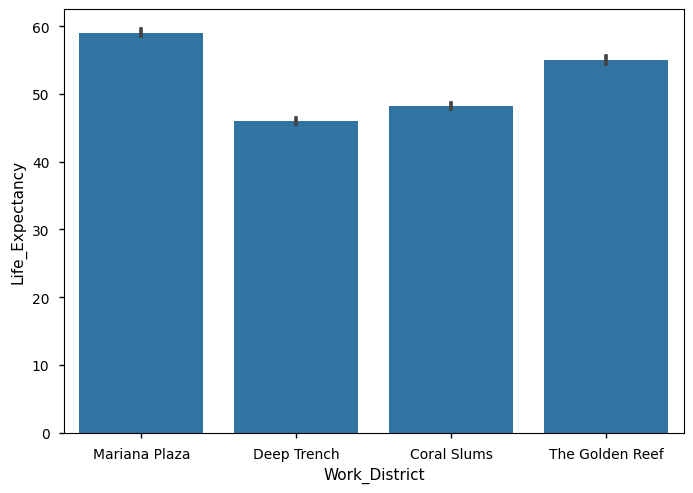

In [14]:
sns.barplot(data = df_eda, x = "Work_District", y = "Life_Expectancy")

<Axes: xlabel='Occupation', ylabel='Wealth_Index'>

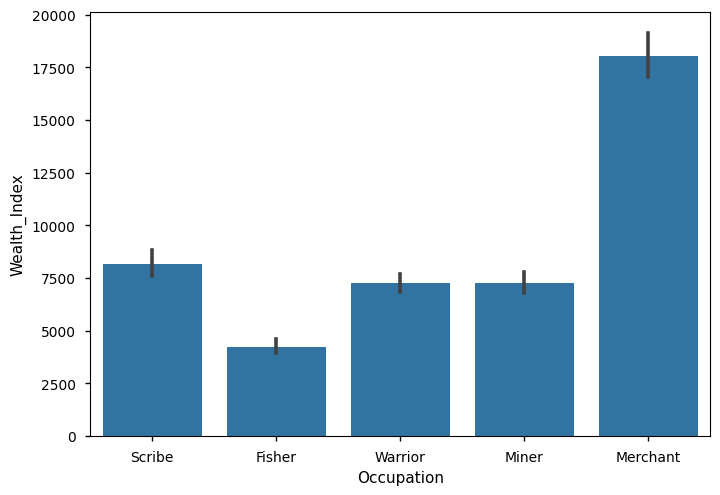

In [15]:
sns.barplot(data = df_eda, x = "Occupation", y = "Wealth_Index")

# Wealth Distribution
This shows a clear distinction between occupations. Merchants are the richest, follow by scribes, warriors and miners, with fisher begin the lowest.

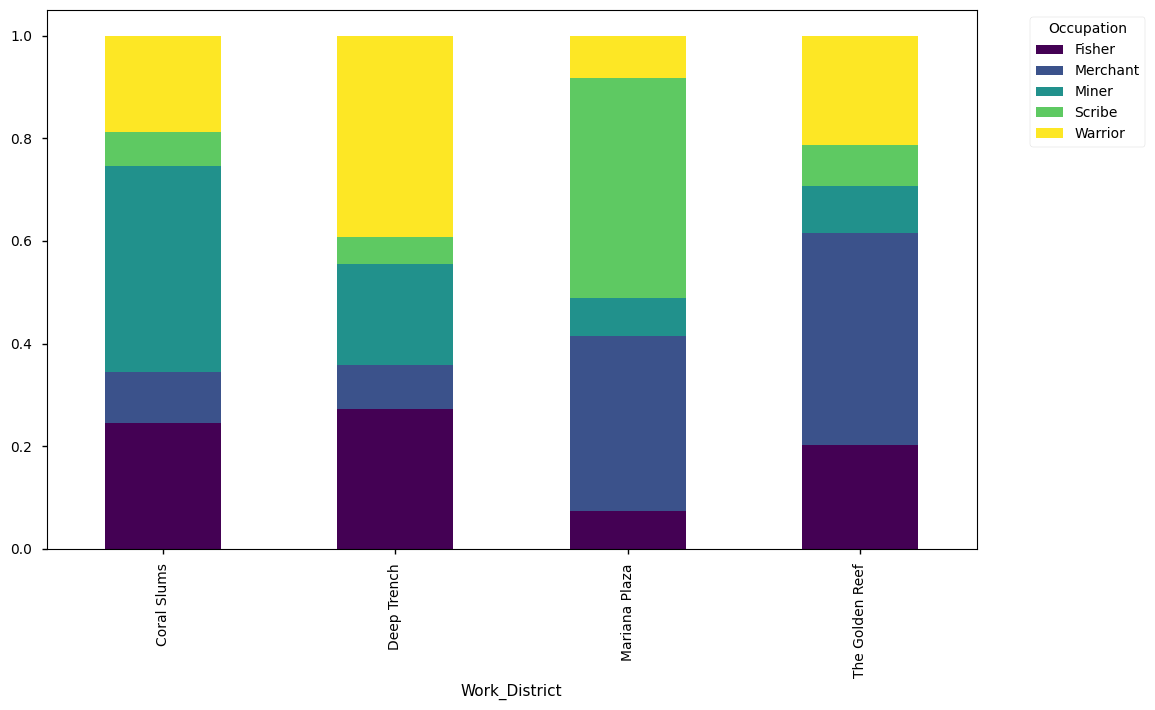

In [16]:
cross_tab = pd.crosstab(df_eda['Work_District'], df_eda['Occupation'])

# Makes it so all rows sum to 1 so we can compare percentages
cross_tab = cross_tab.div(cross_tab.sum(1), axis=0)

cross_tab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')


# District Specialisation
Coral Slums : Many miners and fishers work there. This indicates it is a valuable place for raw materials.

Deep Trench : Fishers and warriors mainly work there. This may be a popular fishing spot because of unique deep sea species. This also seems to be near the border or home to dangerous creatures since warriors work there for security.

Mariana Plaza : Merchants and scribes mainly work there. This may have the central library or record keeping place which the scribes maintain. This may also have a market area where traders come to trade.

The Golden Reef : Many merchants work there. It may be home to many wealthy people who the merchants trade with. 

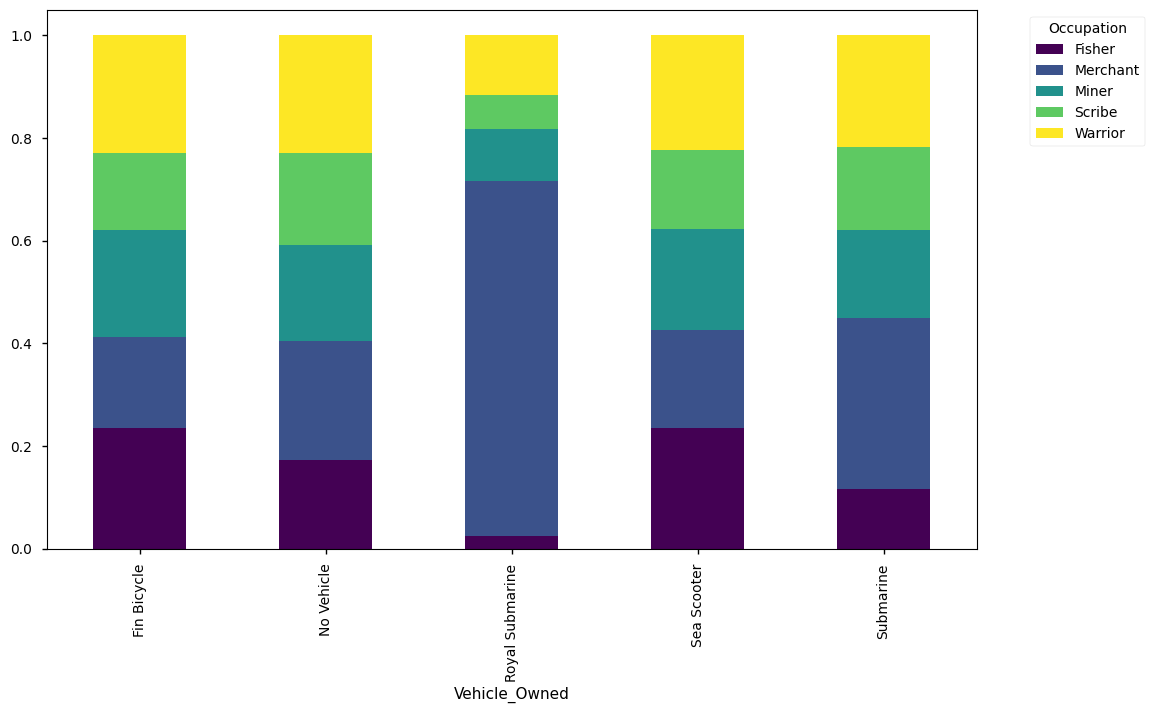

In [17]:
num = pd.crosstab(df_eda['Vehicle_Owned'], df_eda['Occupation'])

# Makes it so all rows sum to 1 so we can compare percentages
num = num.div(num.sum(1), axis=0)

num.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

# Vehicle Utility
Fin bicycle and sea scooter seem to be owned uniformy by all occupations, indicating that they are affordable and an effective mode of transport

Submarines are largely owned by merchants who are rich indicating that submarines are expensive, with royal submarines having a higher price, since its percentage ownership of merchants is even higher.

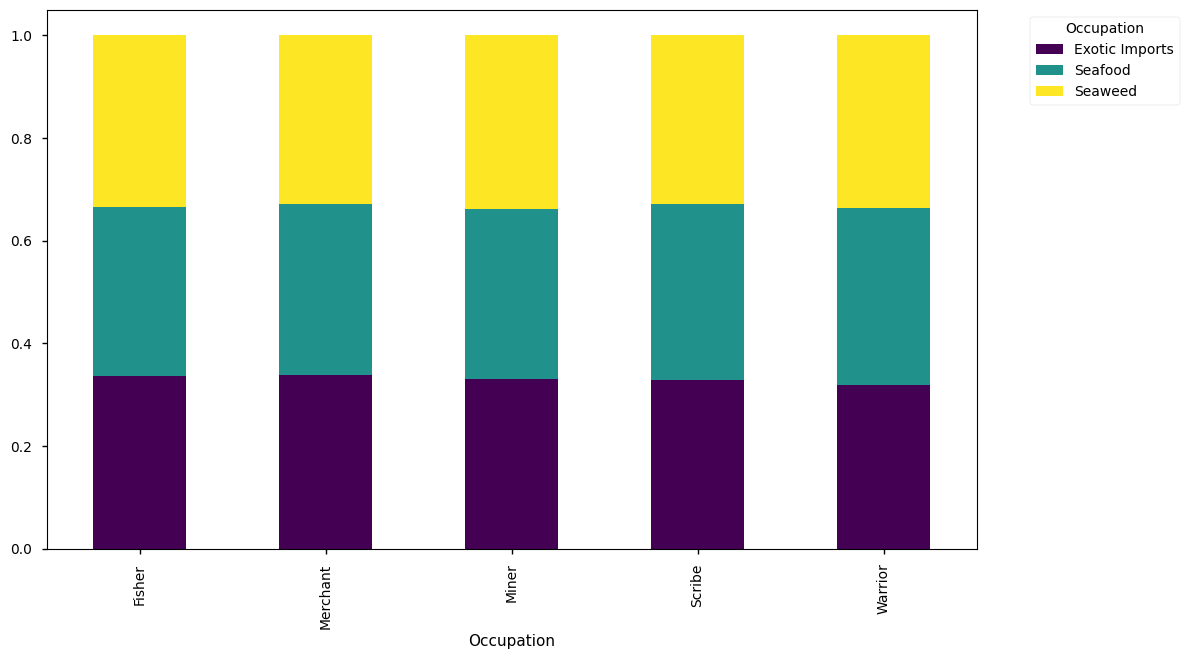

In [18]:
data = pd.crosstab(df_eda['Occupation'], df_eda['Diet_Type'])
# Makes it so all rows sum to 1 so we can compare percentages
data = data.div(data.sum(1), axis=0)

data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

# Dietary Indicators
All occupations seem to have almost equal consumption of all the 3 kinds of diet.
This does not help in predicting occupation. We might drop it.

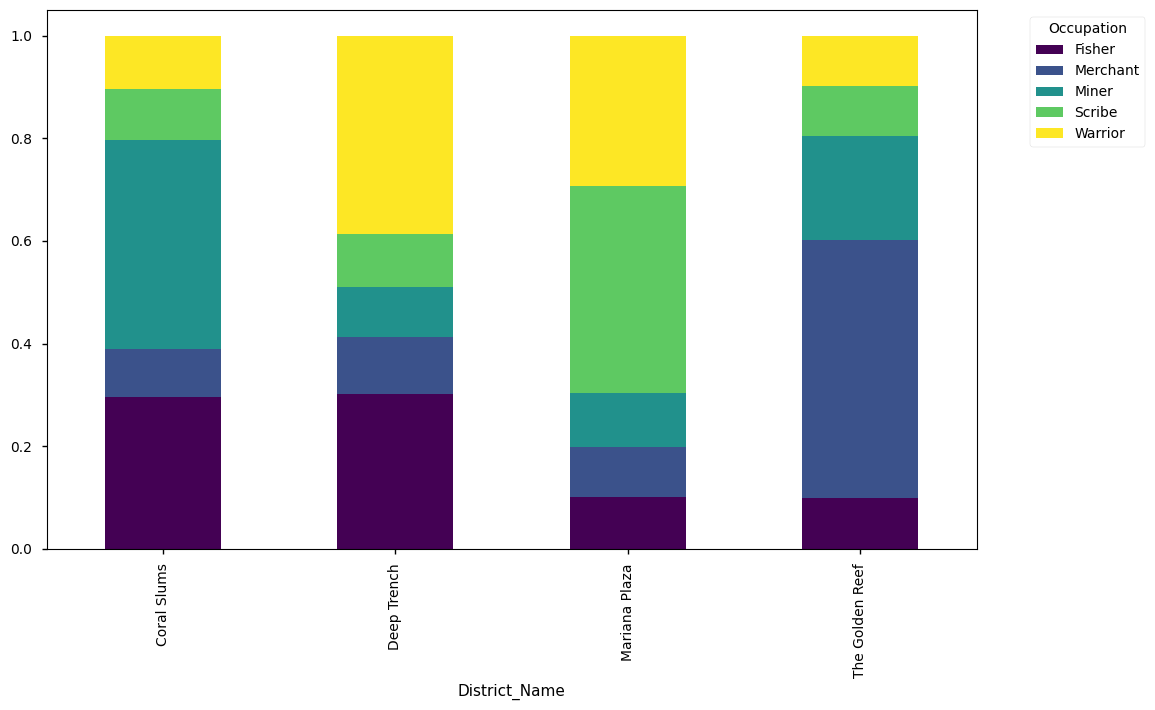

In [19]:
data = pd.crosstab(df_eda['District_Name'], df_eda['Occupation'])
# Makes it so all rows sum to 1 so we can compare percentages
data = data.div(data.sum(1), axis=0)

data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

The pattern is very similar to the work district chart. This indicates many people change districts for work.

Also apart form trading in the golden reef, many merchants live there as well, so there might be trading between merchants as well.

In [20]:
df_eda["Commutes"] = df_eda["District_Name"] != df_eda["Work_District"]

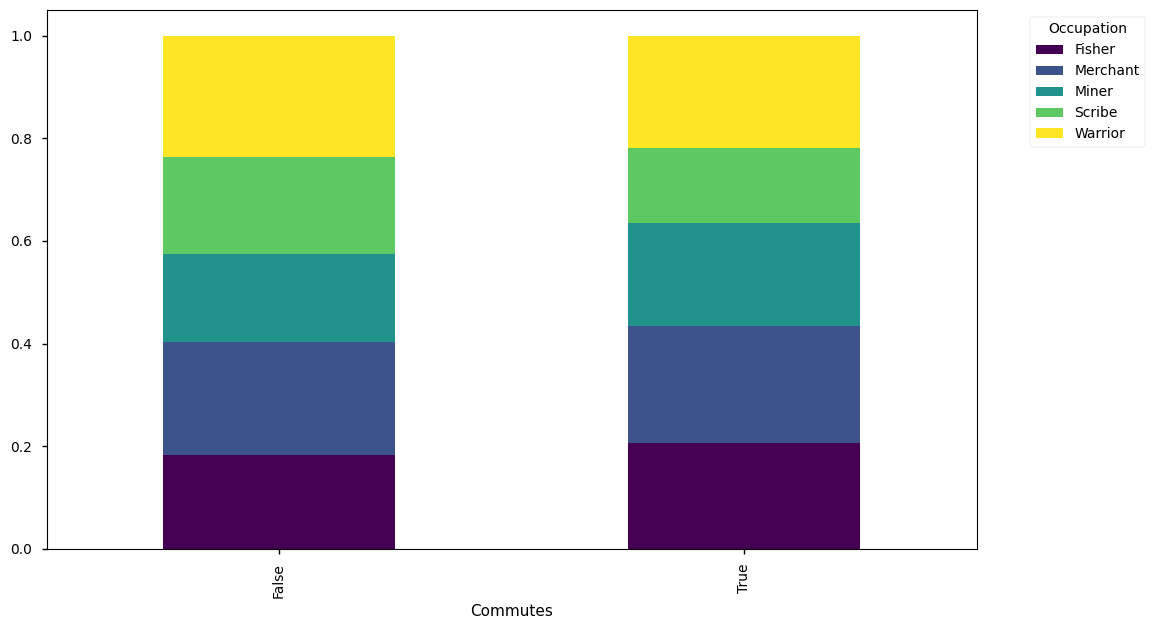

In [21]:
data = pd.crosstab(df_eda['Commutes'], df_eda['Occupation'])
# Makes it so all rows sum to 1 so we can compare percentages
data = data.div(data.sum(1), axis=0)

data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

All occupations seem to have an equal distribution between commuters and non commuters.

<Axes: ylabel='Commutes'>

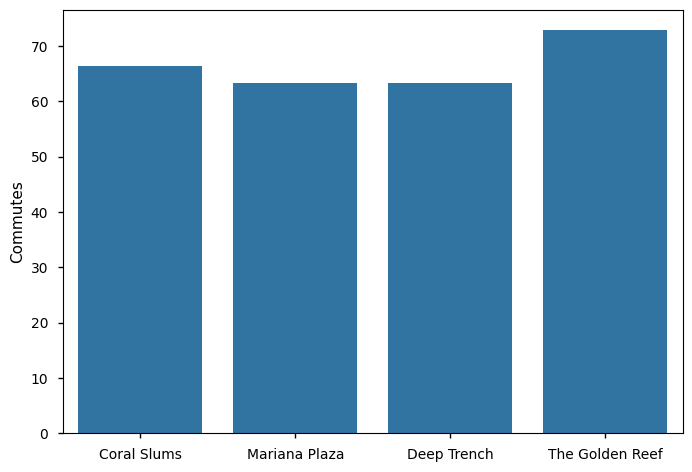

In [22]:
x = df_eda["District_Name"].unique()
x = list(x)
com = df_eda.groupby("District_Name")["Commutes"].sum()/df_eda.groupby("District_Name")["Commutes"].count()*100
sns.barplot(x = x, y = com)

More than 50% of people from each district commute to work.

The Golden Reef has a higher number of commuters. This is valid since merchants who travel for trade are in majority here.

In [23]:
df_eda.groupby("District_Name")["Citizen_ID"].count()

District_Name
Coral Slums        3126
Deep Trench        4696
Mariana Plaza      3118
The Golden Reef    4811
Name: Citizen_ID, dtype: int64

Deep trench and golden reef are preffered living residences

<Axes: xlabel='District_Name', ylabel='Wealth_Index'>

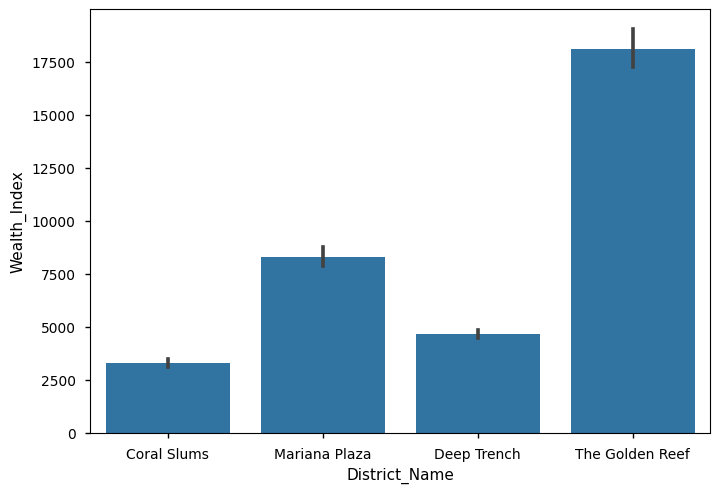

In [24]:
sns.barplot(data = df_eda, x = "District_Name", y = "Wealth_Index")

# Wealth Distribution among Districts
This is as expected since rich merchants live in mariana plaza and golden reef. Golden reef is also the preffered living resisdence for many.

Coral slums and deep trench which are mainly used as a source of raw and precious materials have lower incomes.

<Axes: xlabel='Life_Expectancy', ylabel='House_Size_sq_ft'>

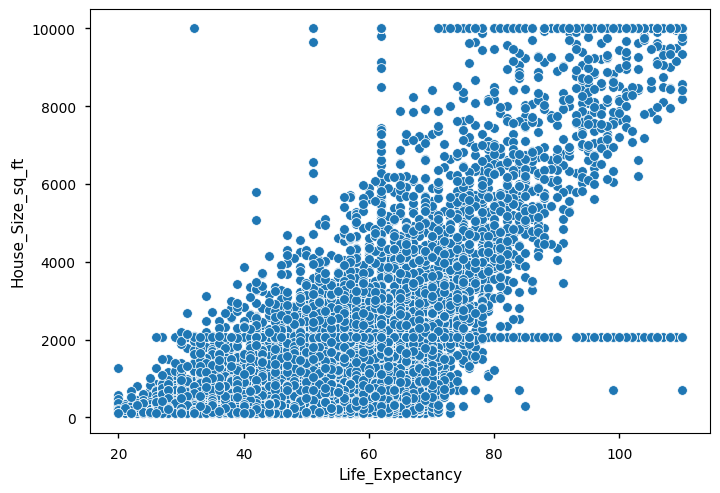

In [25]:
sns.scatterplot(data = df_eda, x = "Life_Expectancy", y = "House_Size_sq_ft")

# Correlation between life expectancy and house size
Life expectancy increases as house size (an indicator of wealth and living conditions) increases

<Axes: xlabel='Diet_Type', ylabel='Wealth_Index'>

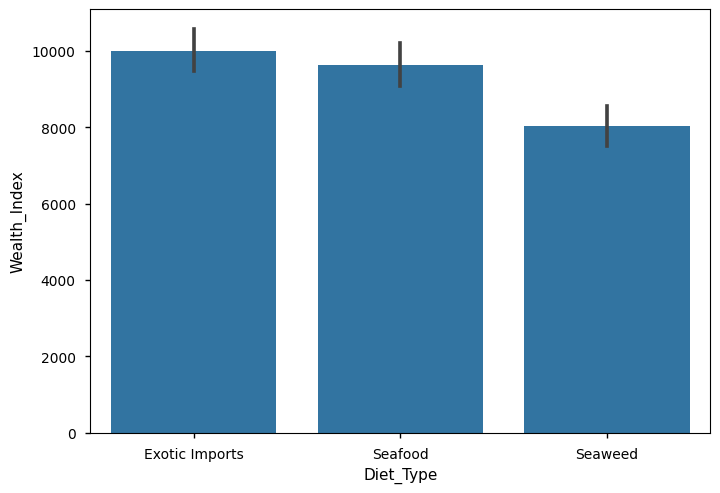

In [26]:
sns.barplot(data = df_eda, x = "Diet_Type", y = "Wealth_Index")

# Effect of wealth on diet
People with higher incomes tend to eat expensive products like exotic imports as expected.

As incomes decrease, people shift to seaweed to compensate.

This also indicates the pricing of these diets

In [27]:
df_eda.groupby("Occupation")["Wealth_Index"].std()

Occupation
Fisher       9560.390659
Merchant    32369.009850
Miner       14497.838952
Scribe      16266.234410
Warrior     12297.410684
Name: Wealth_Index, dtype: float64

# Variation in pay between occupations
Merchants have the highest variation, maybe because of difference in connections and influence.

Fishing seems stable with the lowest variance.

Scribes also have variation maybe depending on seniority or intellect.

In [32]:
df_eda.columns

Index(['Citizen_ID', 'Diet_Type', 'District_Name', 'Occupation',
       'Wealth_Index', 'House_Size_sq_ft', 'Life_Expectancy', 'Vehicle_Owned',
       'Work_District', 'Bio_Hash', 'Commutes'],
      dtype='object')

<Axes: xlabel='Wealth_Index', ylabel='Life_Expectancy'>

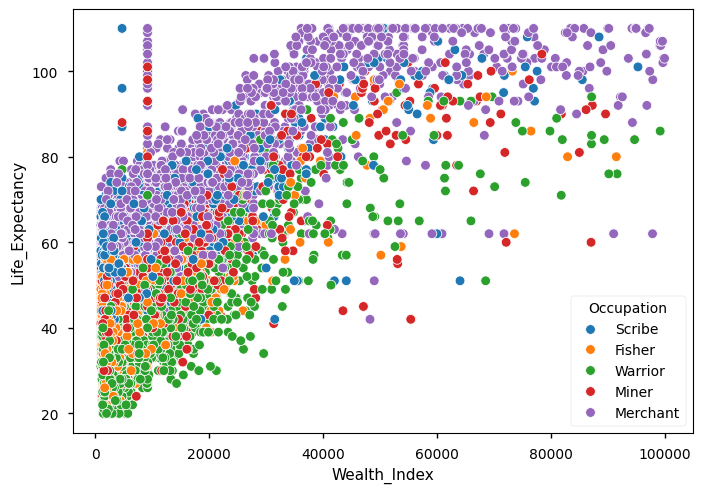

In [35]:
sns.scatterplot(data = df_eda[df_eda["Wealth_Index"]<100000], x = "Wealth_Index", y = "Life_Expectancy", hue = "Occupation")

Since the data points of all the occupations dont seem to be concentrated in similar regions, life/wealth can be a distinguishing feature for occupations